In [11]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

In [2]:
data = pd.read_csv('voted-kaggle-dataset.csv')

In [3]:
data.head()

,Title,Subtitle,Owner,Votes,Versions,Tags,Data Type,Size,License,Views,Download,Kernels,Topics,URL,Description
0,Credit Card Fraud Detection,Anonymized credit card transactions labeled as...,Machine Learning Group - ULB,1241,"Version 2,2016-11-05|Version 1,2016-11-03",crime\nfinance,CSV,144 MB,ODbL,"442,136 views","53,128 downloads","1,782 kernels",26 topics,https://www.kaggle.com/mlg-ulb/creditcardfraud,The datasets contains transactions made by cre...
1,European Soccer Database,"25k+ matches, players & teams attributes for E...",Hugo Mathien,1046,"Version 10,2016-10-24|Version 9,2016-10-24|Ver...",association football\neurope,SQLite,299 MB,ODbL,"396,214 views","46,367 downloads","1,459 kernels",75 topics,https://www.kaggle.com/hugomathien/soccer,The ultimate Soccer database for data analysis...
2,TMDB 5000 Movie Dataset,"Metadata on ~5,000 movies from TMDb",The Movie Database (TMDb),1024,"Version 2,2017-09-28",film,CSV,44 MB,Other,"446,255 views","62,002 downloads","1,394 kernels",46 topics,https://www.kaggle.com/tmdb/tmdb-movie-metadata,Background\nWhat can we say about the success ...
3,Global Terrorism Database,"More than 170,000 terrorist attacks worldwide,...",START Consortium,789,"Version 2,2017-07-19|Version 1,2016-12-08",crime\nterrorism\ninternational relations,CSV,144 MB,Other,"187,877 views","26,309 downloads",608 kernels,11 topics,https://www.kaggle.com/START-UMD/gtd,"Context\nInformation on more than 170,000 Terr..."
4,Bitcoin Historical Data,Bitcoin data at 1-min intervals from select ex...,Zielak,618,"Version 11,2018-01-11|Version 10,2017-11-17|Ve...",history\nfinance,CSV,119 MB,CC4,"146,734 views","16,868 downloads",68 kernels,13 topics,https://www.kaggle.com/mczielinski/bitcoin-his...,Context\nBitcoin is the longest running and mo...


In [4]:
data.shape

(2150, 15)

In [5]:
data['Description']

0       The datasets contains transactions made by cre...
1       The ultimate Soccer database for data analysis...
2       Background\nWhat can we say about the success ...
3       Context\nInformation on more than 170,000 Terr...
4       Context\nBitcoin is the longest running and mo...
                              ...                        
2145    Context\nFortnite: Battle Royale has over 20 m...
2146    Context\nThis dataset provides the nationaliti...
2147    lem.json\nThis file contains lementized englis...
2148    Context\nThis data set contains weather data f...
2149    Context\nBirths in U.S during 1994 to 2003.\nC...
Name: Description, Length: 2150, dtype: object

In [3]:
df = data[['Description']]

In [47]:
df

,Description
0,The datasets contains transactions made by cre...
1,The ultimate Soccer database for data analysis...
2,Background\nWhat can we say about the success ...
3,"Context\nInformation on more than 170,000 Terr..."
4,Context\nBitcoin is the longest running and mo...
...,...
2145,Context\nFortnite: Battle Royale has over 20 m...
2146,Context\nThis dataset provides the nationaliti...
2147,lem.json\nThis file contains lementized englis...
2148,Context\nThis data set contains weather data f...


In [4]:
sw = stopwords.words('english')
lem = WordNetLemmatizer()
def clean(text):
    text = str(text).lower()
    text = re.sub(r'\n',' ',(text))
    text = re.sub(r'[^a-zA-Z]',' ',text)
    text = re.sub(r'\b\w{1,2}\b','',text)
    text = re.sub(r'\s+',' ',text)
    text = ' '.join(lem.lemmatize(word) for word in text.split() if word not in sw)
    return text

In [5]:
df['Description'] = df['Description'].apply(lambda x: clean(x))

In [6]:
df['Description']

0       datasets contains transaction made credit card...
1       ultimate soccer database data analysis machine...
2       background say success movie released certain ...
3       context information terrorist attack global te...
4       context bitcoin longest running well known cry...
                              ...                        
2145    context fortnite battle royale million unique ...
2146    context dataset provides nationality passenger...
2147    lem json file contains lementized english word...
2148    context data set contains weather data los ang...
2149    context birth content data set following struc...
Name: Description, Length: 2150, dtype: object

In [78]:
df['Description'][0]

'datasets contains transaction made credit card september european cardholder dataset present transaction occurred two day fraud transaction dataset highly unbalanced positive class fraud account transaction contains numerical input variable result pca transformation unfortunately due confidentiality issue cannot provide original feature background information data feature principal component obtained pca feature transformed pca time amount feature time contains second elapsed transaction first transaction dataset feature amount transaction amount feature used example dependant cost senstive learning feature class response variable take value case fraud otherwise given class imbalance ratio recommend measuring accuracy using area precision recall curve auprc confusion matrix accuracy meaningful unbalanced classification dataset collected analysed research collaboration worldline machine learning group http mlg ulb ulb universit libre bruxelles big data mining fraud detection detail cur

(-0.5, 999.5, 599.5, -0.5)

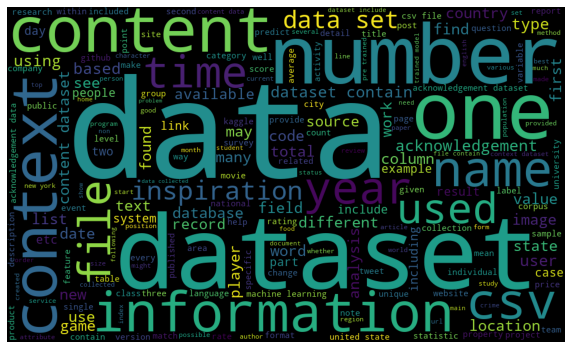

In [7]:
k=' '.join(df['Description'])
wordcloud=WordCloud(width=1000,height=600).generate(k)
plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')

In [8]:
tf = TfidfVectorizer()
dtm = tf.fit_transform(df['Description'])

In [10]:
dtm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
tf.get_feature_names()[89]

'able'

In [35]:
n = NMF(n_components=15, random_state=42)
n.fit(dtm)

NMF(n_components=15, random_state=42)

In [36]:
n.components_[0].argsort()[-10:]

array([10922, 24074,  2618,  5017,   645,  5362, 12447,  5802,  6272,
       26759], dtype=int64)

In [37]:
for i,topic in enumerate(n.components_):
    print(f'{i+1} topic')
    print([tf.get_feature_names()[word] for word in topic.argsort()[-15:]])
    print('\n\n')

1 topic
['extracting', 'security', 'promptcloud', 'listing', 'original', 'house', 'ticker', 'bigger', 'contains', 'airbnb', 'created', 'job', 'dataset', 'description', 'yet']



2 topic
['available', 'content', 'file', 'code', 'http', 'population', 'survey', 'health', 'information', 'set', 'dataset', 'country', 'year', 'state', 'data']



3 topic
['citation', 'opportunity', 'behind', 'easy', 'along', 'attribution', 'inside', 'acquired', 'largest', 'data', 'describing', 'answered', 'front', 'owe', 'others']



4 topic
['vgg', 'deep', 'convolutional', 'architecture', 'imagenet', 'learned', 'transferable', 'depth', 'residual', 'network', 'layer', 'feature', 'pre', 'model', 'trained']



5 topic
['point', 'score', 'sport', 'played', 'play', 'com', 'football', 'data', 'stats', 'league', 'season', 'match', 'team', 'game', 'player']



6 topic
['wikipedia', 'glove', 'dataset', 'article', 'file', 'frequency', 'fasttext', 'sentence', 'speech', 'english', 'vector', 'text', 'corpus', 'language', 

In [38]:
result = n.transform(dtm)

In [42]:
len(result[0])

15

In [45]:
df['Topic'] = result.argmax(axis=1)

In [46]:
df

,Description,Topic
0,datasets contains transaction made credit card...,3
1,ultimate soccer database data analysis machine...,4
2,background say success movie released certain ...,12
3,context information terrorist attack global te...,1
4,context bitcoin longest running well known cry...,10
...,...,...
2145,context fortnite battle royale million unique ...,4
2146,context dataset provides nationality passenger...,1
2147,lem json file contains lementized english word...,5
2148,context data set contains weather data los ang...,11


In [50]:
a = df.groupby(by='Topic')

In [68]:
topic4 = pd.DataFrame(a.get_group(4), columns = df.columns).reset_index()

In [70]:
topic4['Description'][1]

'overview game throne hit fantasy show based equally famous book series song fire ice george martin show well known vastly complicated political landscape large number character frequent character death data source dataset combine three source data based information book series firstly battle csv contains chris albon war five king dataset found http github com chrisalbon war five king dataset great collection battle series secondly character death csv erin pierce ben kahle dataset created part bayesian survival analysis found http allendowney blogspot com bayesian survival analysis game html finally comprehensive character dataset character prediction csv come team song ice data scraped http awoiaf westeros org also includes prediction character die methodology found http got show machine learning algorithm predicts death game throne insight complicated political landscape fantasy world find data course go without saying dataset contains spoiler'